In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("train_image : ", train_images[0])
print("train_labels : ", train_labels[0])

11490434/11490434 [==============================] - 1s 0us/step
train_image :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0  

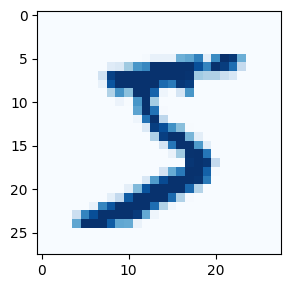

In [3]:
plt.figure(figsize=(3, 3))
plt.imshow(train_images[0].reshape(28, 28), cmap='Blues', interpolation='nearest')

plt.tight_layout()
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28 * 28))       # 3차원 입력을 2차원으로
test_images = test_images.reshape((10000, 28 * 28))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [5]:
train_images = train_images.astype('float32') / 255        # 정규화
test_images = test_images.astype('float32')   / 255

In [6]:
train_labels = to_categorical(train_labels)       # one-hot 인코딩
test_labels = to_categorical(test_labels)
print("train_labels[0] : ", train_labels[:1])
print("test_labels[0]  : ", test_labels[:1])

train_labels[0] :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
test_labels[0]  :  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
# 모델 정의
model = Sequential()
model.add(Dense(10, input_shape = (28 * 28,), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 모델 학습과정 설정하기
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])
filename = '/content/drive/MyDrive/Colab Notebooks/classifier/mnist.h5'
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# fit() 메서드로 모델 훈련 시키기
hist = model.fit(train_images, train_labels,
          epochs = 100, batch_size = 128,
          validation_data=(test_images, test_labels),
          callbacks = [monitor_val_lose, modelcheckpoint] # 저장 및 모니터링
         )

Epoch 1/100
469/469 [==============================] - 11s 17ms/step - loss: 0.6143 - accuracy: 0.1151 - val_loss: 0.5239 - val_accuracy: 0.1311
Epoch 2/100
 14/469 [..............................] - ETA: 3s - loss: 0.5274 - accuracy: 0.1328

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 5s 10ms/step - loss: 0.4778 - accuracy: 0.1419 - val_loss: 0.4332 - val_accuracy: 0.1632
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4124 - accuracy: 0.1724 - val_loss: 0.3869 - val_accuracy: 0.1949
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3766 - accuracy: 0.2039 - val_loss: 0.3600 - val_accuracy: 0.2274
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3547 - accuracy: 0.2363 - val_loss: 0.3428 - val_accuracy: 0.2633
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3400 - accuracy: 0.2717 - val_loss: 0.3307 - val_accuracy: 0.3061
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3292 - accuracy: 0.3110 - val_loss: 0.3216 - val_accuracy: 0.3446
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.3477 - val_loss: 0.3144 - val_accuracy: 0.3849
Epoch 9/10

In [ ]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

In [ ]:
predit = model.predict(test_images)
#for i in range(0,len(predit)) :
#    print("예측값 : ", predit[i], "\t실제값 : ", test_Y[i])
print(predit[0:5])
print(test_labels[0:5])

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(hist.history['loss'], 'r', label = 'train_loss')
plt.plot(hist.history['accuracy'], 'r', label = 'train_accuracy')
#plt.plot(hist.history['val_loss'], 'b', label = 'test_loss')
plt.plot(hist.history['val_accuracy'], 'b', label = 'test_accuracy')
plt.ylabel(' loss and accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()